In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#Jelly Beans: A Sweet Introduction to Random Sampling and Monte Carlo Methods

# Introduction:
Suppose you are at a carnival where you can win a cash prize for guessing the number of jelly beans in a jar. You see that there are only two colors of jelly beans in the jar, green and red. The game master tells you that to fill the jar, he used one pack of green, and three packs of red jelly beans. You are allowed to shake the jar and scoop a portion of the jelly beans to count the number of beans and their proportions. This scooper can retrieve between 45 and 50 jelly beans. We also have an estimate of the proportion of our sample vs. the entire jar. You have unlimited scoops, but must put the jelly beans back into the jar after counting them. You are determined to win this cash prize and take it upon yourself to guess the total number of green jelly beans in the jar and the total number of jelly beans in the jar.</br>
</br>
There is always the possibility of counting each jelly bean by hand, but this is quite tedious. We can use the power of random sampling. By scopping the jelly beans, counting them, and repeating this process many times, we can estimate the total number of jelly beans. This is a Monte Carlo method where random sampling helps solve problems with uncertainty or complexity. Monte Carlo methods are used in various fields like finance, physics, and biology to estimate probabilities, calculat integrals, and model uncertainty. Today, we will apply this technique to estimate the number of jelly beans in a jar!


We will assess the following question, how many scoops does it take to estimate the correct number of jelly beans in the jar? Recall, we know the proportion of green and red jelly beans (0.25). Therefore in each sample we will assess the following:
$$p_{green(sample)}=\frac{\text{Number of Green Jelly Beans Sampled}}{\text{Total Jelly Beans Sampled}}$$
For each sample, we will scale this number based on the fact that we know there are 4 times more red jelly beans than green.
$$N_{green}=p_{green(sample)} \cdot N_{Total}$$
Multiplying this number by 4, we have the estimated total number of jelly beans:
$$\hat{N}_{Total}=N_{green} \cdot 4$$
Let us impliment these simulations in python by doing the following:

# Implimentation:
1. Establish the true values of the total number of jelly beans, the proportion of green jelly beans, and the proportion of the weight of the entire jar one scoop takes up.</br>
</br>
2. Set up the sampling by deciding how many 'scoops' we will use to estimate the total number of jelly beans.</br>
</br>
3. Perform the simulation over the amount of scoops</br>
</br>
4. Observe the following outputs:
- Estimated Proportion of Green Jellybeans
- Estimated number of Green Jelly Beans
- Estimated Number of Total Jelly Beans
- 95% Confidence Interval of Total Jelly Beans

In [ ]:
# ---------------------- 1. Preliminary Values ----------------------------------
true_total = 1000  # Total Jelly Beans
proportion = 0.25  # Proportion of Green Jelly Beans
true_green = true_total * proportion # True Green Jelly Beans
p_weight_sample = 50/true_total # Proportion of the Weight of the Sample vs. The Jar
green_total = true_total * proportion  # Total Green Jelly Beans
red_total = true_total * (1 - proportion)  # Total Red Jelly Beans

# ------------------------ 2. Sampling Setup ----------------------------------
num_simulations = 10000
sample_size = np.random.uniform(45, 50, num_simulations).round().astype(int)  # Random sample sizes
green_counts = []  # Initialize Count of Green Jelly Beans
est_tot_counts = [] # Initialize Count of Total Jelly Beans

# ----------------------- 3. Perform Simulations ------------------------------
for i in range(num_simulations):
    # Generate a Random Jar with Green and Red Jelly Beans
    jar = np.random.choice(["green", "red"], size=true_total, p=[proportion, 1 - proportion])

    # Randomly Sample From Jar (Scoop)
    sample = np.random.choice(jar, size=sample_size[i], replace=True)  # Use sample_size[i] for this simulation

    # Calculate the Proportion of Green Jelly Beans in the Sample
    green_sample = np.sum(sample == "green")
    green_prop = green_sample / sample_size[i]

    # ----------------------------- Estimates -----------------------------
    est_green = green_sample * (1/p_weight_sample) # # Green Estimate
    est_total = est_green * 4 # Total Estimate
    green_counts.append(est_green) # Mean of Green
    est_tot_counts.append(est_total) # Mean of Totals

# ------------------------- Confidence Interval --------------------------------
st_error = np.sqrt(np.var(est_tot_counts))/np.sqrt(num_simulations)# Standard Error for Total
z = sp.stats.norm.ppf(0.975)# Z-Score
est = np.mean(est_tot_counts) # Mean Estimate for Total
upper = round(est + z * st_error) # Upper Confidence Interval
lower = round(est - z * st_error) # Lower Confidence Interval

# ----------------------- 4. Results ------------------------------------------------
print("Proportion of Green Jelly Beans: ", np.mean(green_counts)/np.mean(est_tot_counts))
print("Mean of Green Count: ", np.mean(green_counts))
print("Mean of Total Count: ", np.mean(est_tot_counts))
print("True total Count: ", true_total)
print("95% Confidence Interval of Total: (",lower,",",upper,")")




Proportion of Green Jelly Beans:  0.25
Mean of Green Count:  237.244
Mean of Total Count:  948.976
True total Count:  1000
95% Confidence Interval of Total: ( 944 , 954 )


Let us run this simulation for increasing simulations. We will first create a function that does the same and incriment the number of simulations.

In [ ]:
total_results = []
lower_results = []
upper_results = []
diff_results = []
st_error_results = []

# --------------------- Jelly Bean Monte Function -------------------------------
def jellyBeanMonte(num_simulations):

  for i in range(num_simulations):
    # Generate a Random Jar with Green and Red Jelly Beans
    jar = np.random.choice(["green", "red"], size=true_total, p=[proportion, 1 - proportion])

    # Randomly Sample From Jar (Scoop)
    sample = np.random.choice(jar, size=sample_size[i], replace=True)  # Use sample_size[i] for this simulation

    # Calculate the Proportion of Green Jelly Beans in the Sample
    green_sample = np.sum(sample == "green")
    green_prop = green_sample / sample_size[i]

    # ----------------------------- Estimates -----------------------------
    est_green = green_sample * (1/p_weight_sample) # # Green Estimate
    est_total = est_green * 4 # Total Estimate
    #green_counts.append(est_green) # Mean of Green
    #est_tot_counts.append(est_total) # Mean of Totals

  # --------------------------- Output ----------------------------------
  # --- Confidence Interval ---
  st_error = np.sqrt(np.var(est_tot_counts))/np.sqrt(num_simulations)# Standard Error for Total
  z = sp.stats.norm.ppf(0.975)# Z-Score
  est = np.mean(est_total) # Mean Estimate for Total
  upper = round(est + z * st_error) # Upper Confidence Interval
  lower = round(est - z * st_error) # Lower Confidence Interval
  diff = upper - lower # Difference from Upper and Lower CI

  # -------------------------- Print Results ------------------------------------
  #print("Count of Total Jelly Beans: ",est,"\n",
  #      "95% Confidence Interval of Total: (",lower,",",upper,")")

  return st_error, diff, est, lower, upper

# --------------------- Loop of Simulations --------------------------------------
num_sim = 100 # Number of Total Simulations
for i in range(1,num_sim):
  st_error, diff, est, lower, upper = jellyBeanMonte(i) # Simulation
  total_results.append(est) # Append Total Count List
  lower_results.append(lower) # Append Lower CI List
  upper_results.append(upper) # Append Upper CI List
  diff_results.append(diff) # Append CI Difference List
  st_error_results.append(st_error) # Append Standard Error List
  if i == num_sim-1:
    print("Complete!")

#print(total_results)


Complete!


Let's Graph the Confidence Interval:

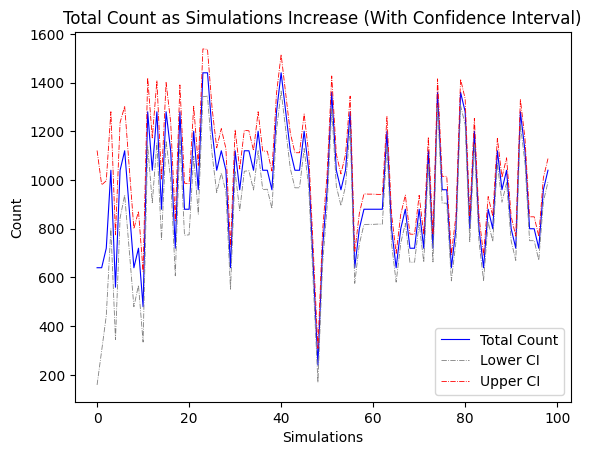

In [ ]:
# ------------------------------ Graph CI ------------------------------------
plt.plot(total_results, label='Total Count', color='blue',linewidth=0.8)  # Count
plt.plot(lower_results, label='Lower CI', color='gray', linestyle='-.', linewidth=0.6)  # Lower CI as gray dotted line
plt.plot(upper_results, label='Upper CI', color='red', linestyle='-.', linewidth=0.6)  # Upper CI as gray dotted line

# Labeling the axes and setting the title
plt.xlabel("Simulations")  # X-Label
plt.ylabel("Count")  # Y-Label
plt.title("Total Count as Simulations Increase (With Confidence Interval)")  # Title

# Adding a legend
plt.legend()

# Show the plot
plt.show()

Text(0.5, 1.0, 'Confidence Interval Range of Total Count as Simulations Increase')

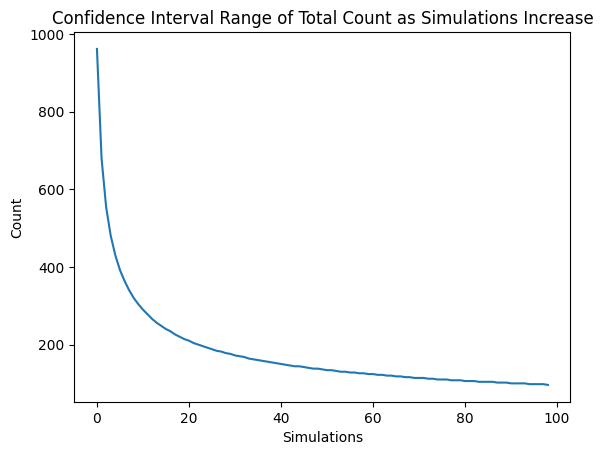

In [ ]:
# ----------------------------- Plot CI Difference -----------------------------
plt.plot(diff_results) # Difference in Upper and Lower CI
plt.xlabel("Simulations") # x-Label
plt.ylabel("Count") # Y-Label
plt.title("Confidence Interval Range of Total Count as Simulations Increase")

The confidence interval narrows as the number of sumulations increases due to the **Law of Large Numbers**. This Law of Large Numbers states: For an identically distributed, randomly generated variables increases, their sample mean approaches their theoretical mean. In simpler terms, as we conduct more simulations and calculate the means, the variablilty among those means decreases.</br>
</br>
To observe this, we can graph the standard error, which quantifies the uncertainty around the sample mean, defined by the formula:
$$\text{standard error} = \frac{\sigma}{\sqrt{n}}$$
where:</br>
**$\sigma$** is the population standard deviation, reflecting the variablility in the population from which samples are drawn and</br>
**$n$** represents the number of observations (or sample size) in our simulations.</br>
</br>
As $n$ increases, the standard error decreases, which in turn leads to a more precise estimate of the population mean. This phenomenon results in a narrower confidence interval, reflecting increased confidence in our estimates as more simulations are performed.  




Text(0.5, 1.0, 'Standard Error of Counts as Simulations Increase')

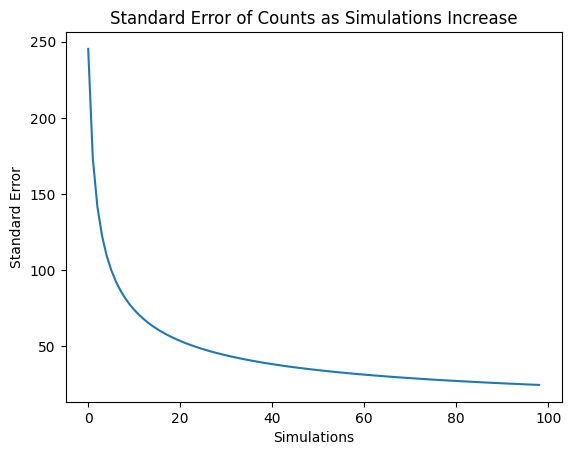

In [ ]:
# ----------------------------- Plot CI Difference -----------------------------
plt.plot(st_error_results) # Difference in Upper and Lower CI
plt.xlabel("Simulations") # x-Label
plt.ylabel("Standard Error") # Y-Label
plt.title("Standard Error of Counts as Simulations Increase")

# Conclusion

The Monte Carlo simulation for estimating the total number of jelly beans showcases the versitality and power of this method in tackling problems involving randomness and incertainty. By sampling from the jar repeatedly, we used a simple but effective technique to approximate not only the total count but also the proportions of green jelly beans. dispite a small margin of error, our method yielded results close to the true values, demonstrating the reliability of Monte Carlo approaches in statistical estimation.</br>
</br>
This example also hilights the trade-off between computational effort and accuracy. As observed, increasing the number of simulations narrows the confidence interval, enhancing precision. This trade-off is a cornerstone of Monte Carlo methods, applicable across fields like finance, physics, and machine learning.</br>
</br>
Monte Carlo simulations are not just about solving problems—they are about approaching uncertainty with creativity and computation. Whether you are estimating jelly beans or calculating complex integrals, Monte Carlo methods provide a pathway to approximate solutions where exact ones are hard to find. By embracing randomness, we gain insight, accuracy, and an edge in problem-solving.